In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

seed = sum(map(ord, "Posterior predictive checks"))
rng = np.random.RandomState(seed)
sns.set_context('notebook')
sns.set_style('darkgrid')

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.5.0
Running on ArviZ v0.15.1


In [2]:
with pm.Model() as m:
    x = pm.MutableData('x', [-2, -1, 0, 1, 2])
    y_obs = [-4, -1.5, 0, 1.5, 4]
    beta = pm.Normal("beta")
    y = pm.Normal("y", mu=beta * x, sigma =0.1, shape=x.shape, observed=y_obs)
    idata = pm.sample(random_seed=rng)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


In [3]:
with m:
    ppc = pm.sample_posterior_predictive(idata, random_seed=rng)

Sampling: [y]


In [4]:
az.plot_ppc(idata, num_pp_samples=100);

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\didit\AppData\Local\Temp\ipykernel_21256\1179287498.py", line 1, in <module>
    az.plot_ppc(idata, num_pp_samples=100);
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\arviz\plots\ppcplot.py", line 226, in plot_ppc
    raise TypeError(f'`data` argument must have the group "{groups}" for ppcplot')
TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^

In [5]:
with m:
    #make predictions conditioned on new Xs
    pm.set_data({"x": [-1, 3, 5]})
    ppc = pm.sample_posterior_predictive(idata, predictions=True, random_seed=rng)

Sampling: [y]


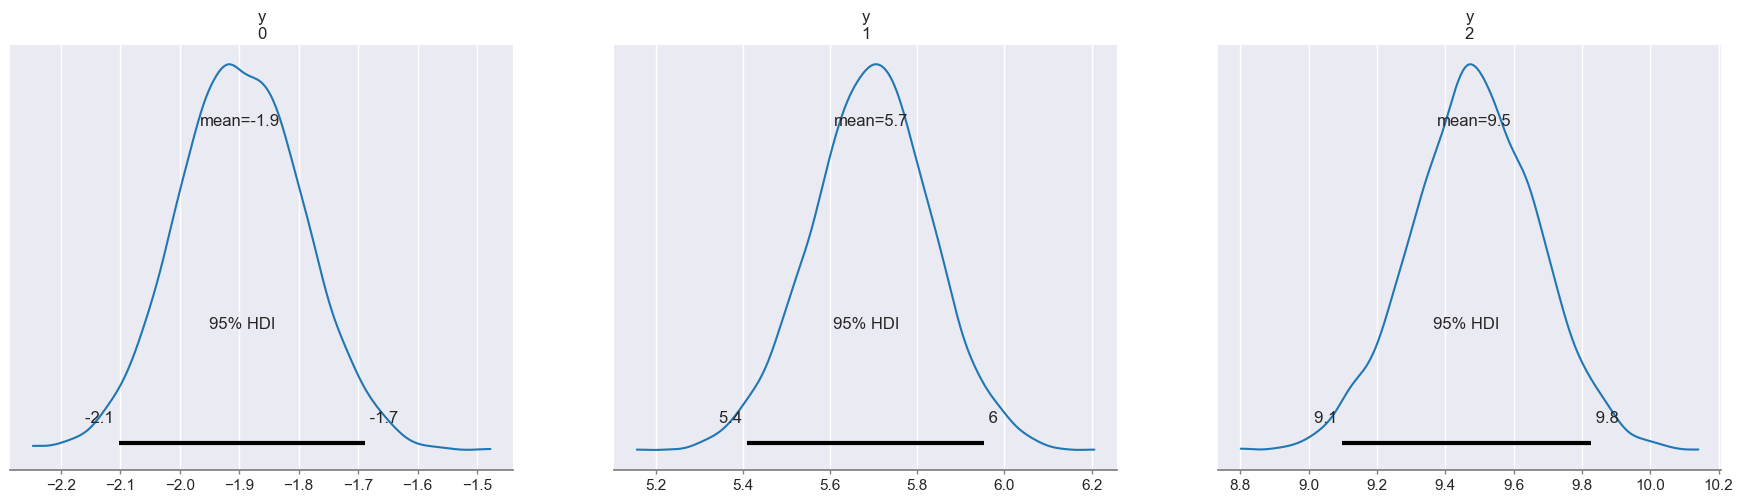

In [6]:
az.plot_posterior(ppc, round_to=2, group="predictions", hdi_prob=0.95);

In [7]:
# Generate data
N = 1000
X = np.random.normal(size=N)
y = 2 * X +3 + np.random.normal(size=N)



In [8]:
# Define model
with pm.Model() as model:
    #define priors
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    #likelihood
    y_obs = pm.Normal('y_obs', mu=alpha + beta * X, sigma=sigma, observed=y)
    #sample MCMC
    idata = pm.sample(4000, tune=2000, return_inferencedata=True) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 49 seconds.


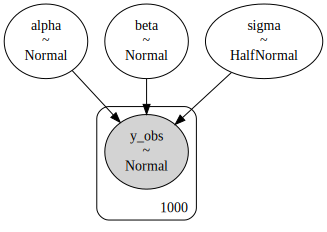

In [9]:
#plot the model using graphviz
pm.model_to_graphviz(model)

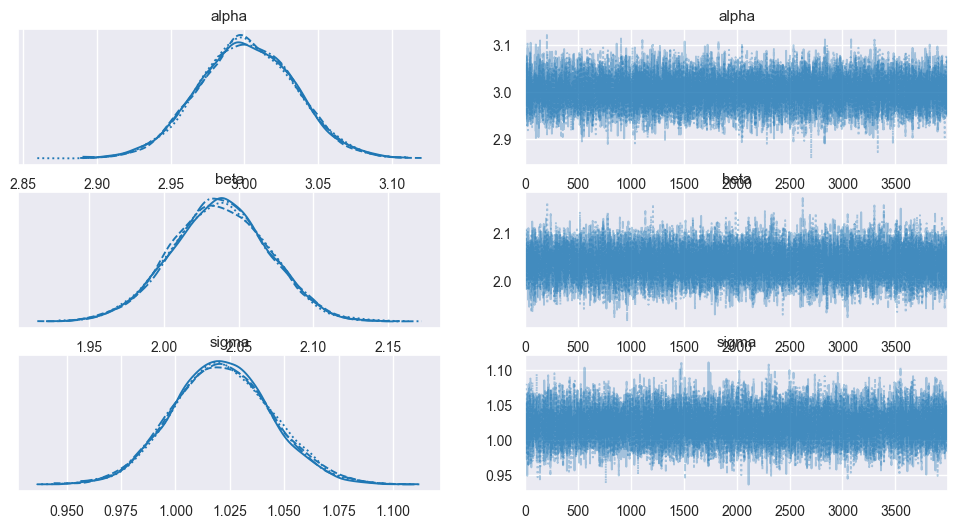

In [10]:
import arviz as az
az.plot_trace(idata);

In [11]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.002,0.033,2.943,3.065,0.0,0.0,23137.0,12776.0,1.0
beta,2.037,0.032,1.979,2.100,0.0,0.0,24848.0,12375.0,1.0
sigma,1.021,0.023,0.981,1.066,0.0,0.0,24309.0,12888.0,1.0


In [14]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

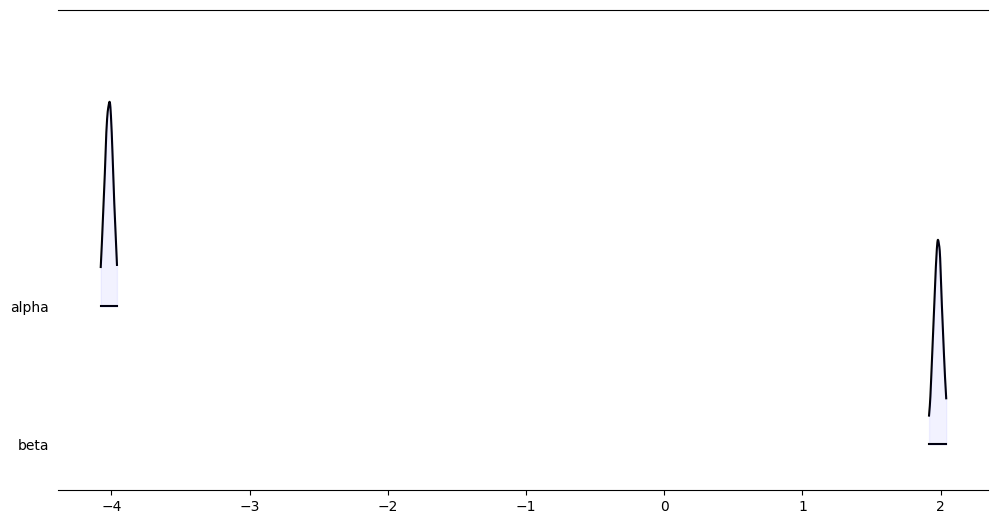

In [15]:
az.plot_forest(idata, var_names=["alpha", "beta"], combined=True, kind="ridgeplot", ridgeplot_alpha=0.05, colors="blue");

In [16]:
#plot ppc
with pm.Model() as model:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

In [17]:
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 2000)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    alpha    (chain, draw) float64 -4.072 -3.985 -4.021 ... -4.011 -4.011 -4.02
    beta     (chain, draw) float64 2.0 1.958 1.998 1.976 ... 1.963 1.963 2.017
    sigma    (chain, draw) float64 1.051 1.036 1.007 1.028 ... 1.03 1.03 1.035
Attributes:
    created_at:                 2023-06-26T00:40:32.015680
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.5.0
    sampling_time:              17.20834517478943
    tuning_steps:               2000